Name: Rudy Orre  
Section: 0130  
Date: 12 May 2021

# Homework 8: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/estimation.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
pip install gofer-grader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.

from gofer.ok import check

## 1. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters*, or the proportion of the votes that each candidate received from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [3]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

vote
C
C
T
C
T
T
T
C
U
C


**Question 1.** Below, complete the given  code that will use bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**. Make sure that you understand what's going on here. It may be helpful to explain `proportions_in_resamples` to a friend or TA.

In [4]:
def proportions_in_resamples():
    prop_c = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample()
        single_proportion = np.count_nonzero(bootstrap.column(0) == 'C') / votes.num_rows
        prop_c = np.append(prop_c, single_proportion)
    return prop_c

In the following cell, we run the function you just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstraps. Based on what the original polling proportions were, does the graph seem reasonable? Talk to a friend or ask a TA if you are unsure!

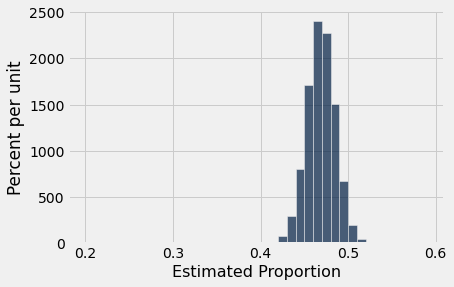

In [5]:
sampled_proportions = proportions_in_resamples()
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 2.** Using the array `sampled_proportions`, find the values that bound the middle 95% of the values in the data. (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

In [6]:
c_lower_bound = percentile(2.5, sampled_proportions)
c_upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.437000, 0.500000]


In [7]:
check('tests/q1_2.py')


**Question 3.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

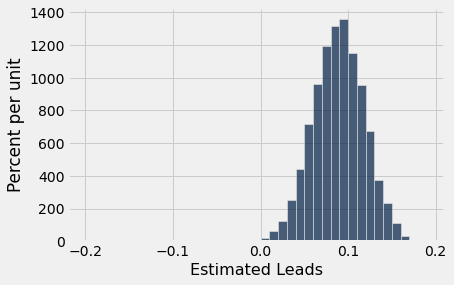

In [8]:
bins = np.arange(-0.2,0.2,0.01)

def leads_in_resamples():
    leads = np.array([])
    for i in np.arange(5000):
        bootstrap = votes.sample()
        c_proportion = np.count_nonzero(bootstrap.column(0) == 'C') / votes.num_rows
        t_proportion = np.count_nonzero(bootstrap.column(0) == 'T') / votes.num_rows
        leads = np.append(leads, c_proportion - t_proportion)
    return leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Leads', sampled_leads).hist(bins=bins)

In [9]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.032000, 0.146000]


In [10]:
check('tests/q1_4.py')


## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer may have been different; that doesn't mean it was wrong!)

#### Question 1
Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

No, the 95% confidence interval of [.439,.5] is rather the middle 95% of possible values for the true proportion of Candidate C voters based on our interpretation of statistics. This means that there is onl a 5% chance that the true proportion of Candidate C voters are not between [.439,.5].

#### Question 2
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

I'd like to say that it is a 95% probability that the interval contains the true proportion, but after reading some posts about Bayesian vs Frequentist reasoning, I am almost confident that it IS NOT a 95% probability, however I am not sure what it really is any more. I think saying that it is a 95% probability is a nice and easy answer that seems to make intuitive sense, however it seems like it isn't case, so I'll be researching this idea.


**A note about this question (this is outside of the scope of this class. If you don't already know what Bayesian and Frequentist reasoning are, don't worry about it!):** You may recall that there are different philosophical interpretation of probability. The Bayesian interpretation says that it is meaningful to talk about the probability that the interval covers the true proportion, but a Bayesian would perform a different calculation to calculate that number; we have no guarantee that it is 95%. All we are guaranteed is the statement in the answer to the next question.


#### Question 3
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

Assign your answer to `true_proportion_intervals`.

In [11]:
true_proportion_intervals = 9500

In [12]:
check('tests/q2_3.py')

**Question 4**

The staff also created 80%, 90%, and 99% confidence intervals from one sample, but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents. (Write the percentage after each interval below.) **Then**, explain your thought process.

**Answers:**

$[.444,.495]$: 90%

$[.450,.490]$: 80%

$[.430,.511]$: 99%

I simply matched the intervals to the confidence interval percentages by the relationship of greater percentages being associated with wider intervals. The second interval has the smallest range, so it got the smallest percentage, 80%. Then so on and so forth.

Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among
voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question 5** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `candidates_tied` to the number corresponding to the correct answer.

1. Reject the null
2. Fail to reject the null
3. Unable to tell using our staff confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://www.inferentialthinking.com/chapters/13/4/using-confidence-intervals.html) of the textbook.

In [13]:
candidates_tied = 1

In [14]:
check('tests/q2_5.py')

#### Question 6
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null
2. Fail to reject the null
3. Unable to tell using our staff confidence interval

In [15]:
cutoff_one_percent = 3

In [16]:
check('tests/q2_6.py')

#### Question 7
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null
2. Fail to reject the null
3. Unable to tell using our staff confidence interval

In [17]:
cutoff_ten_percent = 3

In [18]:
check('tests/q2_7.py')

## 3. Submission


Congratulations, you're done with Homework 8!  Be sure to 
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Hit the Submit button** Your submission will be saved and grade will be posted when it's finished running.

In [19]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('hw08.ipynb', sorted(glob.glob('tests/q*.py'))))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.439000, 0.501000]
Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.032000, 0.146000]
['tests/q1_2.py', 'tests/q1_4.py', 'tests/q2_3.py', 'tests/q2_5.py', 'tests/q2_6.py', 'tests/q2_7.py']
Question 1:


Question 2:


Question 3:


Question 4:


Question 5:


Question 6:


Question 7:


1.0

Name: Rudy Orre  
Section: 0130  
Date: 12 May 2021